In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df_online_shoppers_intention = pd.read_csv('online_shoppers_intention.csv')
df_online_shoppers_intention.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [3]:
# check for null values 
null_values = df_online_shoppers_intention.isnull().sum()

# Calculate percentage of null values
total_rows = len(df_online_shoppers_intention)
null_percentage = (null_values/total_rows)*100

# Create a DataFrame to display null values and their percentage 
null_df = pd.DataFrame({'Null Values': null_values,'Null Percentage':null_percentage})

null_df

Null Values  Null Percentage
Administrative                     0              0.0
Administrative_Duration            0              0.0
Informational                      0              0.0
Informational_Duration             0              0.0
ProductRelated                     0              0.0
ProductRelated_Duration            0              0.0
BounceRates                        0              0.0
ExitRates                          0              0.0
PageValues                         0              0.0
SpecialDay                         0              0.0
Month                              0              0.0
OperatingSystems                   0              0.0
Browser                            0              0.0
Region                             0              0.0
TrafficType                        0              0.0
VisitorType                        0              0.0
Weekend                            0              0.0
Revenue                            0              0.0

In [4]:
df_online_shoppers_intention.describe().T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

In [5]:
df_online_shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Encode the categorical variables
df_cat = df_online_shoppers_intention.select_dtypes(include='object')

In [7]:
df_cat = pd.get_dummies(df_cat, drop_first=True)

In [8]:
df_cat = df_cat.reset_index()

In [9]:
# Scale the numerical data 
df_num = df_online_shoppers_intention.select_dtypes(include=[np.number])

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scale = ss.fit_transform(df_num)

In [11]:
scale = pd.DataFrame(scale,columns=df_num.columns)

In [12]:
scale

Administrative  Administrative_Duration  Informational  \
0           -0.696993                -0.457191      -0.396478   
1           -0.696993                -0.457191      -0.396478   
2           -0.696993                -0.457191      -0.396478   
3           -0.696993                -0.457191      -0.396478   
4           -0.696993                -0.457191      -0.396478   
...               ...                      ...            ...   
12325        0.206173                 0.363075      -0.396478   
12326       -0.696993                -0.457191      -0.396478   
12327       -0.696993                -0.457191      -0.396478   
12328        0.507228                -0.032916      -0.396478   
12329       -0.696993                -0.457191      -0.396478   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.244931       -0.691003                -0.624348   
1                   -0.244931       -0.668518                -0.590903   
2                   -0.244931       -0.691003                -0.624348   
3                   -0.244931       -0.668518                -0.622954   
4                   -0.244931       -0.488636                -0.296430   
...                       ...             ...                      ...   
12325               -0.244931        0.478227                 0.307822   
12326               -0.244931       -0.601062                -0.380957   
12327               -0.244931       -0.578577                -0.528063   
12328               -0.244931       -0.376210                -0.443536   
12329               -0.244931       -0.646033                -0.613243   

       BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
0         3.667189   3.229316   -0.317178   -0.308821         -1.233426   
1        -0.457683   1.171473   -0.317178   -0.308821         -0.136078   
2         3.667189   3.229316   -0.317178   -0.308821          2.058618   
3         0.573535   1.994610   -0.317178   -0.308821          0.961270   
4        -0.045196   0.142551   -0.317178   -0.308821          0.961270   
...            ...        ...         ...         ...               ...   
12325    -0.310366  -0.288966    0.342125   -0.308821          2.058618   
12326    -0.457683  -0.447364   -0.317178   -0.308821          0.961270   
12327     1.261014   0.897093   -0.317178   -0.308821          0.961270   
12328    -0.457683  -0.453140   -0.317178   -0.308821         -0.136078   
12329    -0.457683   0.485525   -0.317178   -0.308821          0.961270   

        Browser    Region  TrafficType  
0     -0.790293 -0.894178    -0.762629  
1     -0.207952 -0.894178    -0.514182  
2     -0.790293  2.437081    -0.265735  
3     -0.207952 -0.477771    -0.017289  
4      0.374389 -0.894178    -0.017289  
...         ...       ...          ...  
12325  2.121412 -0.894178    -0.762629  
12326 -0.207952 -0.894178     0.976499  
12327 -0.207952 -0.894178     2.218733  
12328 -0.207952 -0.061364     1.721839  
12329 -0.207952 -0.894178    -0.514182  

[12330 rows x 14 columns]

In [13]:
scale = scale.reset_index()

In [14]:
X = pd.concat([scale,df_cat],axis=1)

In [15]:
X.isnull().sum()

index                            0
Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
index                            0
Month_Dec                        0
Month_Feb                        0
Month_Jul                        0
Month_June                       0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep                        0
VisitorType_Other                0
VisitorType_Returning_Visitor    0
dtype: int64

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          12330 non-null  int64  
 1   Administrative                 12330 non-null  float64
 2   Administrative_Duration        12330 non-null  float64
 3   Informational                  12330 non-null  float64
 4   Informational_Duration         12330 non-null  float64
 5   ProductRelated                 12330 non-null  float64
 6   ProductRelated_Duration        12330 non-null  float64
 7   BounceRates                    12330 non-null  float64
 8   ExitRates                      12330 non-null  float64
 9   PageValues                     12330 non-null  float64
 10  SpecialDay                     12330 non-null  float64
 11  OperatingSystems               12330 non-null  float64
 12  Browser                        12330 non-null 

## Find the Optimal number of clusters 

In [18]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [19]:
cluster_range = range(1,16)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(X)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
cluster_df.Cluster_Errors = round(cluster_df.Cluster_Errors,6)

In [20]:
cluster_df

Num_Clusters  Cluster_Errors
0              1    3.124196e+11
1              2    7.810511e+10
2              3    3.471397e+10
3              4    1.952725e+10
4              5    1.249862e+10
5              6    8.679609e+09
6              7    6.378609e+09
7              8    4.882602e+09
8              9    3.858855e+09
9             10    3.125433e+09
10            11    2.582911e+09
11            12    2.174758e+09
12            13    1.849665e+09
13            14    1.594738e+09
14            15    1.390150e+09

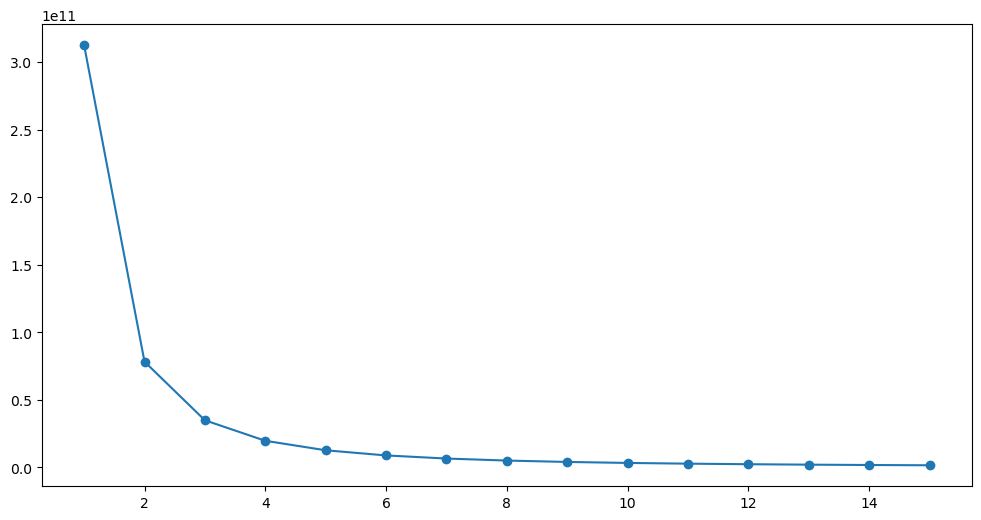

In [21]:
# Visualize the cluster
plt.figure(figsize=(12,6))
plt.plot(cluster_df.Num_Clusters,cluster_df.Cluster_Errors,marker='o')
plt.show()

In [22]:
# Create clusters based on optimal numbers that we achieved from elbow diagram. 
# k = 3

kmeans = KMeans(n_clusters=3,n_init=15,random_state=2345)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[ 2.04750000e+03, -1.46846829e-01, -8.67408386e-02,
        -8.71945812e-02, -5.15157150e-02, -2.06693069e-01,
        -1.66357066e-01,  7.37434972e-02,  1.11648909e-01,
        -6.57325245e-02,  2.64618657e-01, -3.74884153e-02,
        -2.58282030e-02, -3.39148001e-02, -7.63067703e-02,
         2.04750000e+03,  1.47104551e-15,  4.49218750e-02,
         7.00828284e-16, -5.37764278e-16,  4.65576172e-01,
         4.89501953e-01,  4.55191440e-15, -6.73072709e-16,
        -5.82867088e-16,  1.80411242e-16,  8.96728516e-01],
       [ 1.02675000e+04,  2.47658343e-02,  1.16273832e-02,
         7.92841345e-02,  5.08182341e-02,  2.01540370e-01,
         1.92011481e-01, -3.83408152e-02, -5.26943084e-02,
         4.18546148e-02, -3.08821366e-01,  6.02948714e-02,
         1.54388110e-02, -1.10796059e-02,  5.44622575e-02,
         1.02675000e+04,  3.96459748e-01, -4.30211422e-16,
         2.77555756e-16, -3.98986399e-16, -3.19189120e-15,
         9.27036226e-15,  6.03540252e-01, -3.88578059e-

In [23]:
# Create labels for the data
centroid_df = pd.DataFrame(centroids,columns = list(X))
centroid_df.index.name = 'label'
centroid_df.reset_index()

label    index  Administrative  Administrative_Duration  Informational  \
0      0   2047.5       -0.146847                -0.086741      -0.087195   
1      1  10267.5        0.024766                 0.011627       0.079284   
2      2   6150.5        0.121496                 0.074778       0.007343   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.051516       -0.206693                -0.166357   
1                0.050818        0.201540                 0.192011   
2                0.000349        0.003762                -0.026875   

   BounceRates  ExitRates  ...     Month_Feb     Month_Jul    Month_June  \
0     0.073743   0.111649  ...  4.492188e-02  7.008283e-16 -5.377643e-16   
1    -0.038341  -0.052694  ... -4.302114e-16  2.775558e-16 -3.989864e-16   
2    -0.035021  -0.058395  ... -4.215378e-16  1.051095e-01  7.007299e-02   

      Month_Mar     Month_May     Month_Nov     Month_Oct     Month_Sep  \
0  4.655762e-01  4.895020e-01  4.551914e-15 -6.730727e-16 -5.828671e-16   
1 -3.191891e-15  9.270362e-15  6.035403e-01 -3.885781e-16 -7.910339e-16   
2 -2.997602e-15  3.306569e-01  1.238443e-01  1.335766e-01  1.090024e-01   

   VisitorType_Other  VisitorType_Returning_Visitor  
0       1.804112e-16                       0.896729  
1       1.939864e-02                       0.828080  
2       1.216545e-03                       0.842579  

[3 rows x 28 columns]

In [24]:
# Create a new dataframe only with the labels 
df_labels = pd.DataFrame(kmeans.labels_,columns=list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
snail_df_labeled = X.join(df_labels)
df_analysis = (snail_df_labeled.groupby(['labels'],axis=0)).head(12330)
df_analysis

C:\Users\Chetan\AppData\Local\Temp\ipykernel_14936\4239755298.py:5: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_analysis = (snail_df_labeled.groupby(['labels'],axis=0)).head(12330)
C:\Users\Chetan\AppData\Local\Temp\ipykernel_14936\4239755298.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_analysis = (snail_df_labeled.groupby(['labels'],axis=0)).head(12330)


index  Administrative  Administrative_Duration  Informational  \
0          0       -0.696993                -0.457191      -0.396478   
1          1       -0.696993                -0.457191      -0.396478   
2          2       -0.696993                -0.457191      -0.396478   
3          3       -0.696993                -0.457191      -0.396478   
4          4       -0.696993                -0.457191      -0.396478   
...      ...             ...                      ...            ...   
12325  12325        0.206173                 0.363075      -0.396478   
12326  12326       -0.696993                -0.457191      -0.396478   
12327  12327       -0.696993                -0.457191      -0.396478   
12328  12328        0.507228                -0.032916      -0.396478   
12329  12329       -0.696993                -0.457191      -0.396478   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.244931       -0.691003                -0.624348   
1                   -0.244931       -0.668518                -0.590903   
2                   -0.244931       -0.691003                -0.624348   
3                   -0.244931       -0.668518                -0.622954   
4                   -0.244931       -0.488636                -0.296430   
...                       ...             ...                      ...   
12325               -0.244931        0.478227                 0.307822   
12326               -0.244931       -0.601062                -0.380957   
12327               -0.244931       -0.578577                -0.528063   
12328               -0.244931       -0.376210                -0.443536   
12329               -0.244931       -0.646033                -0.613243   

       BounceRates  ExitRates  PageValues  ...  Month_Jul  Month_June  \
0         3.667189   3.229316   -0.317178  ...      False       False   
1        -0.457683   1.171473   -0.317178  ...      False       False   
2         3.667189   3.229316   -0.317178  ...      False       False   
3         0.573535   1.994610   -0.317178  ...      False       False   
4        -0.045196   0.142551   -0.317178  ...      False       False   
...            ...        ...         ...  ...        ...         ...   
12325    -0.310366  -0.288966    0.342125  ...      False       False   
12326    -0.457683  -0.447364   -0.317178  ...      False       False   
12327     1.261014   0.897093   -0.317178  ...      False       False   
12328    -0.457683  -0.453140   -0.317178  ...      False       False   
12329    -0.457683   0.485525   -0.317178  ...      False       False   

       Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
0          False      False      False      False      False   
1          False      False      False      False      False   
2          False      False      False      False      False   
3          False      False      False      False      False   
4          False      False      False      False      False   
...          ...        ...        ...        ...        ...   
12325      False      False      False      False      False   
12326      False      False       True      False      False   
12327      False      False       True      False      False   
12328      False      False       True      False      False   
12329      False      False       True      False      False   

       VisitorType_Other  VisitorType_Returning_Visitor  labels  
0                  False                           True       0  
1                  False                           True       0  
2                  False                           True       0  
3                  False                           True       0  
4                  False                           True       0  
...                  ...                            ...     ...  
12325              False                           True       1  
12326              False                           True       1  
12327        

In [25]:
df_analysis.labels.value_counts()

labels
1    4121
2    4109
0    4100
Name: count, dtype: int64

In [26]:
df_analysis.shape

(12330, 28)

In [27]:
for col in df_analysis.columns:
    print(f"{col} : {df_analysis[col].shape}")

index : (12330, 2)
Administrative : (12330,)
Administrative_Duration : (12330,)
Informational : (12330,)
Informational_Duration : (12330,)
ProductRelated : (12330,)
ProductRelated_Duration : (12330,)
BounceRates : (12330,)
ExitRates : (12330,)
PageValues : (12330,)
SpecialDay : (12330,)
OperatingSystems : (12330,)
Browser : (12330,)
Region : (12330,)
TrafficType : (12330,)
index : (12330, 2)
Month_Dec : (12330,)
Month_Feb : (12330,)
Month_Jul : (12330,)
Month_June : (12330,)
Month_Mar : (12330,)
Month_May : (12330,)
Month_Nov : (12330,)
Month_Oct : (12330,)
Month_Sep : (12330,)
VisitorType_Other : (12330,)
VisitorType_Returning_Visitor : (12330,)
labels : (12330,)


In [28]:
df_analysis.head()

index  Administrative  Administrative_Duration  Informational  \
0      0       -0.696993                -0.457191      -0.396478   
1      1       -0.696993                -0.457191      -0.396478   
2      2       -0.696993                -0.457191      -0.396478   
3      3       -0.696993                -0.457191      -0.396478   
4      4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  ...  Month_Jul  Month_June  Month_Mar  \
0     3.667189   3.229316   -0.317178  ...      False       False      False   
1    -0.457683   1.171473   -0.317178  ...      False       False      False   
2     3.667189   3.229316   -0.317178  ...      False       False      False   
3     0.573535   1.994610   -0.317178  ...      False       False      False   
4    -0.045196   0.142551   -0.317178  ...      False       False      False   

   Month_May  Month_Nov  Month_Oct  Month_Sep  VisitorType_Other  \
0      False      False      False      False              False   
1      False      False      False      False              False   
2      False      False      False      False              False   
3      False      False      False      False              False   
4      False      False      False      False              False   

   VisitorType_Returning_Visitor  labels  
0                           True       0  
1                           True       0  
2                           True       0  
3                           True       0  
4                           True       0  

[5 rows x 28 columns]

In [29]:
df_analysis.drop('index',axis=1,inplace=True)

In [30]:
df_analysis.reset_index(inplace=True)

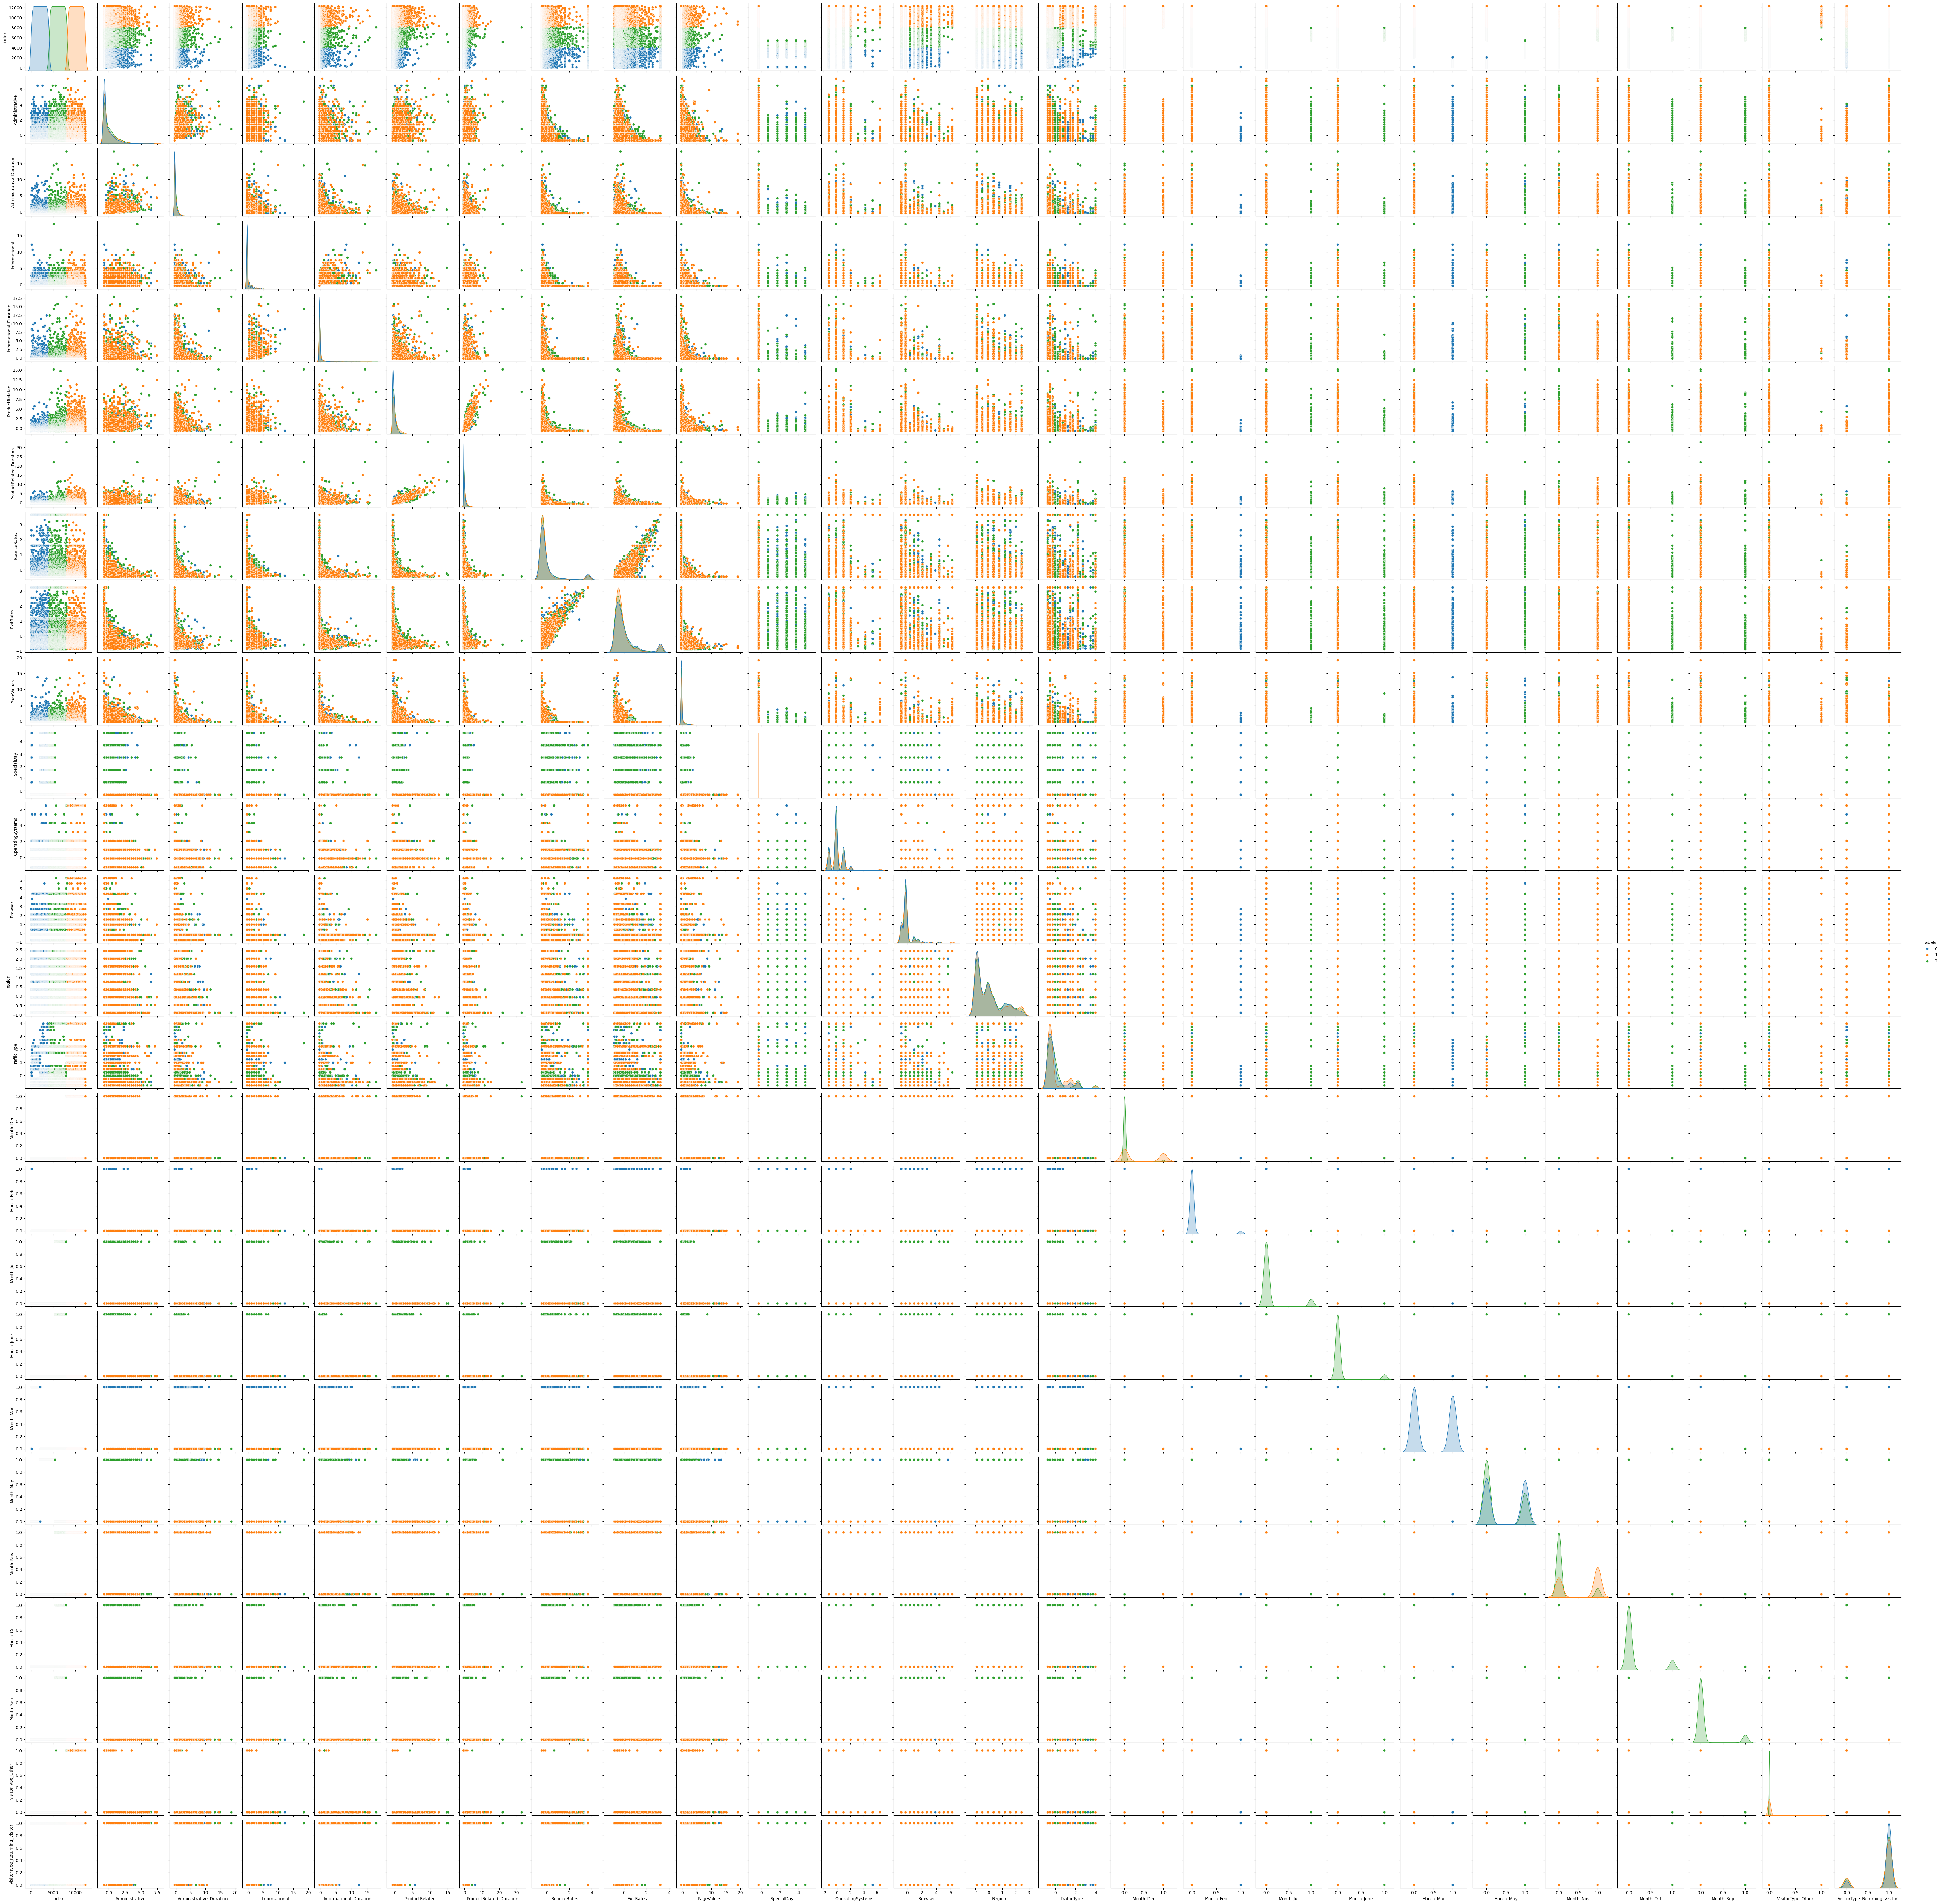

In [31]:
# Visualize the clusters 
sns.pairplot(data=df_analysis,hue='labels')